# Anime-Recommender-System-Project-2025

<center>
  <img src='https://mostaql.hsoubcdn.com/uploads/thumbnails/1450164/661a5b0c8a072/dataset-card.jpg'width='700'/>
</center>

# Table of Contents
- [1. Project Overview](#1-project-overview)
  - [1.1 Introduction](#11-introduction)
  - [1.2 Problem Statement](#12-problem-statement)
  - [1.3 Objectives](#13-objectives)
- [2. Importing Packages](#2-importing-packages)
- [3. Loading Data](#3-loading-data)
- [4. Data Cleaning](#4-data-cleaning)
- [5. Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
- [6. Preprocessing](#6-preprocessing)
- [7. Model Training](#7-model-training)
- [8. Model Evaluation](#8-model-evaluation)
- [9. Hyperparameter Tuning](#9-hyperparameter-tuning)
- [10. Conclusion](#10-conclusion)

### 1. Project Overview

##### 1.1 Introduction

##### 1.2 Problem Statement

##### 1.3 Objectives

### 2. Importing Packages

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import re
from html import unescape
import html

### 3. Loading Data

In [127]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_anime = pd.read_csv('anime.csv')
df_submission = pd.read_csv('submission.csv')

#### 3.1. Exploratory Data Analysis(EDA)
In this section, we explore the dataset to understand its structure and the information it contains. The code snippets below provide an overview of the dataset's shape, the number of columns, and metadata information about the dataset.

In [129]:
datasets = {'Train': df_train, 'Test': df_test, 'Anime': df_anime, 'Submission': df_submission}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info(), "\n")

Dataset: Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703555 entries, 0 to 5703554
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB
None 

Dataset: Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB
None 

Dataset: Anime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5  

**Checking for Missing Values and shape of each dataset**

In [131]:
for name, df in datasets.items():
    print(f"{name} shape: {df.shape}")
    print(f"Missing values in {name}:\n{df.isnull().sum()}\n")

Train shape: (5703555, 3)
Missing values in Train:
user_id     0
anime_id    0
rating      0
dtype: int64

Test shape: (633686, 2)
Missing values in Test:
user_id     0
anime_id    0
dtype: int64

Anime shape: (12294, 7)
Missing values in Anime:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Submission shape: (3, 2)
Missing values in Submission:
ID        0
rating    0
dtype: int64



**Summary Statistics**

In [133]:
for name, df in datasets.items():
    print(f"Summary of {name}:\n")
    print(df.describe(), "\n")

Summary of Train:

            user_id      anime_id        rating
count  5.703555e+06  5.703555e+06  5.703555e+06
mean   3.674460e+04  8.902142e+03  7.808691e+00
std    2.101174e+04  8.882174e+03  1.572449e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.898500e+04  1.239000e+03  7.000000e+00
50%    3.680200e+04  6.213000e+03  8.000000e+00
75%    5.487300e+04  1.407500e+04  9.000000e+00
max    7.351600e+04  3.447500e+04  1.000000e+01 

Summary of Test:

             user_id       anime_id
count  633686.000000  633686.000000
mean    36777.752605    8909.389543
std     21028.330970    8880.430436
min         1.000000       1.000000
25%     18974.000000    1240.000000
50%     36919.000000    6213.000000
75%     54908.000000   14131.000000
max     73516.000000   34367.000000 

Summary of Anime:

           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482

In [134]:
for name, df in datasets.items():
    for col in df.select_dtypes(include=['object']).columns:
        print(f"Frequency of {col} in {name}:")
        print(df[col].value_counts())  # Sorted by frequency
        print("\n")

Frequency of name in Anime:
name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64


Frequency of genre in Anime:
genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                 

In [135]:
# Reading the anime.csv file into a DataFrame
anime_df = pd.read_csv('anime.csv')
print(anime_df.head(3))

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   

   members  
0   200630  
1   793665  
2   114262  


In [136]:
# Reading the train.zip (csv) file into a DataFrame
train_df = pd.read_csv('train.csv')
print(train_df.head(3))

   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10


In [137]:
# Reading the test.csv file into a DataFrame
test_df = pd.read_csv('test.csv')
print(test_df.head(3))

   user_id  anime_id
0    40763     21405
1    68791     10504
2    40487      1281


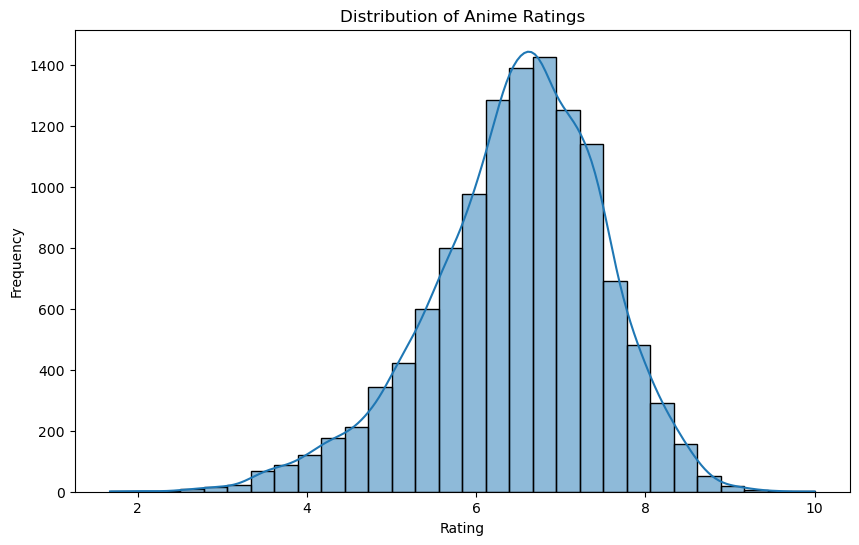

In [138]:
# Distribution of anime ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

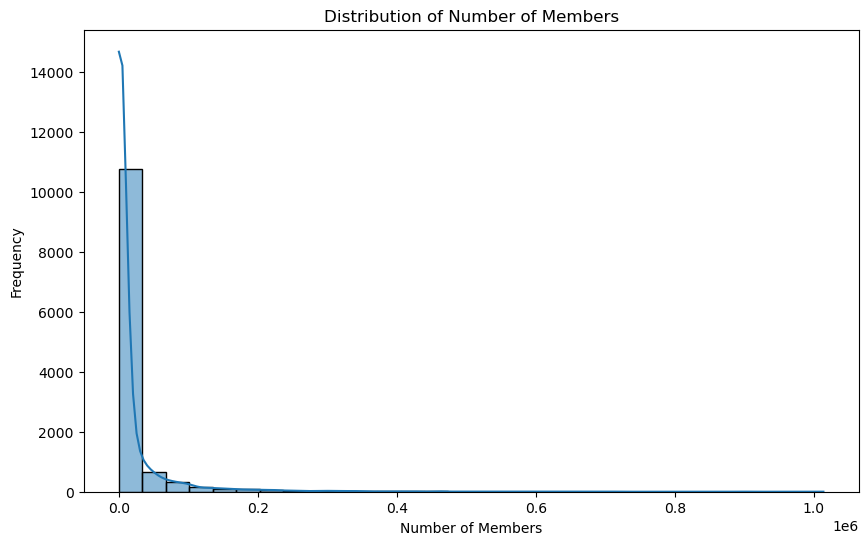

In [139]:
# Distribution of number of members
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['members'], bins=30, kde=True)
plt.title('Distribution of Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Frequency')
plt.show()

C:\Users\Fransisca Nong\AppData\Local\Temp\ipykernel_12252\2996469722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='rating', data=anime_df, palette="Set2")  # Try 'husl', 'coolwarm', 'pastel', etc.


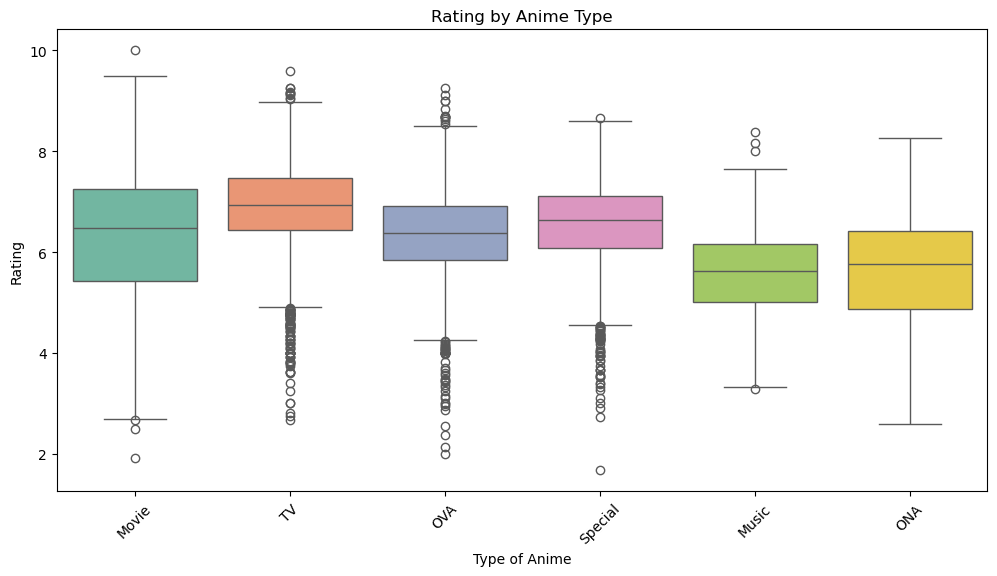

In [140]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating', data=anime_df, palette="Set2")  # Try 'husl', 'coolwarm', 'pastel', etc.
plt.title('Rating by Anime Type')
plt.xlabel('Type of Anime')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

C:\Users\Fransisca Nong\AppData\Local\Temp\ipykernel_12252\4269145224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='members', y='name', data=top_10_anime, palette=colors, orient='h')


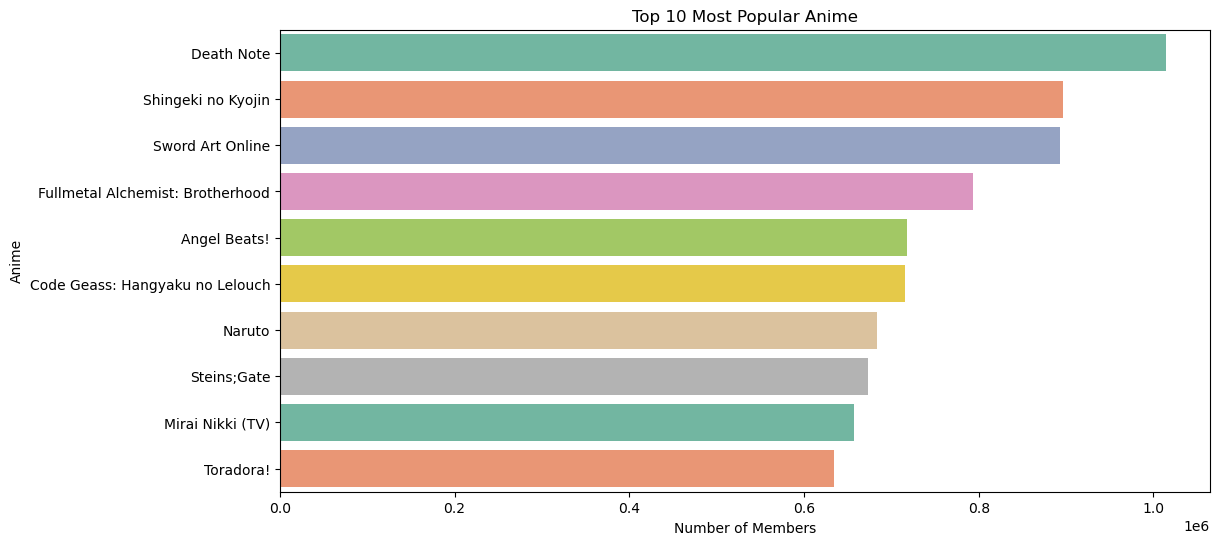

In [141]:
# Top 10 most popular anime
top_10_anime = anime_df.sort_values(by='members', ascending=False).head(10)

# Define a custom color palette with distinct colors
colors = sns.color_palette("Set2", len(top_10_anime))  # You can change "Set2" to other palettes like "Set1", "Paired", etc.

plt.figure(figsize=(12, 6))
sns.barplot(x='members', y='name', data=top_10_anime, palette=colors, orient='h')
plt.title('Top 10 Most Popular Anime')
plt.xlabel('Number of Members')
plt.ylabel('Anime')
plt.show()


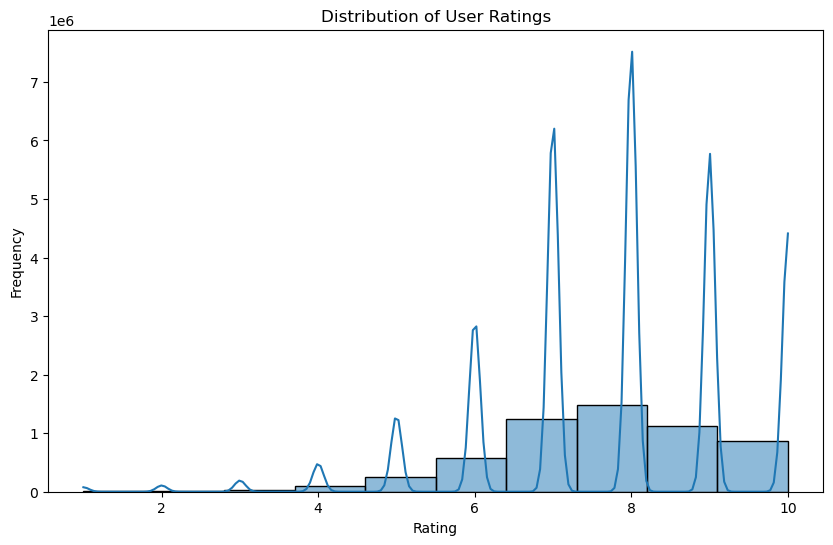

In [142]:
# Distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(train_df['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\Fransisca Nong\AppData\Local\Temp\ipykernel_12252\460541747.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=top_rated_animes, palette=colors, orient='h')


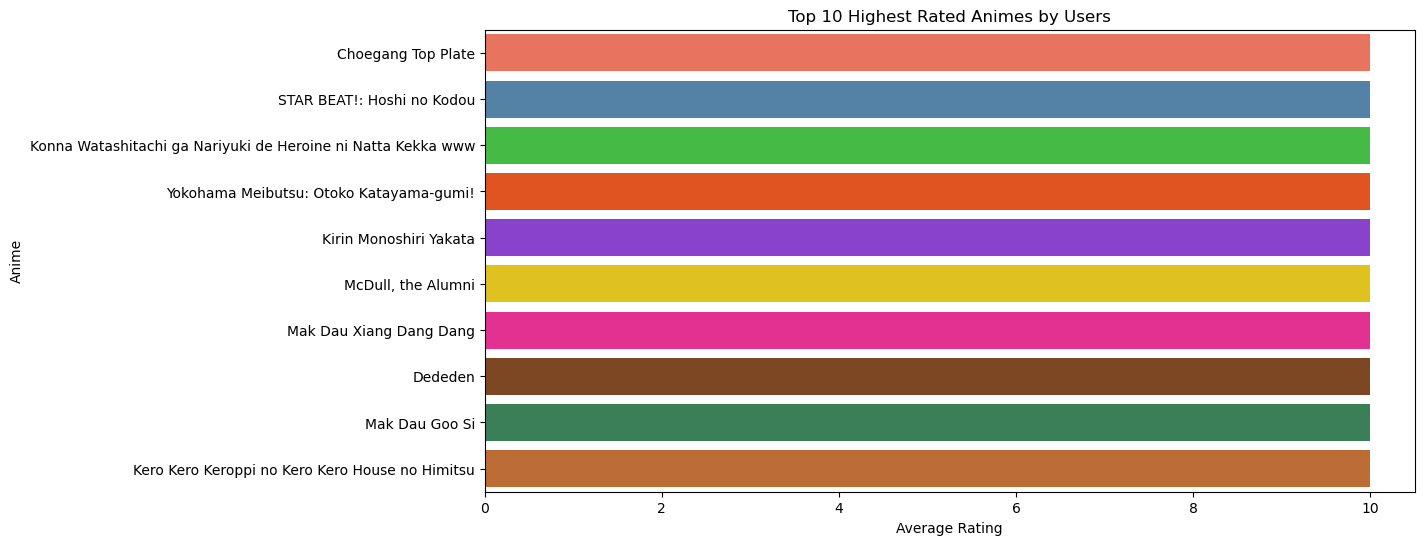

In [143]:
# Top rated animes by users
top_rated_animes = train_df.groupby('anime_id').mean()['rating'].sort_values(ascending=False).head(10).reset_index()
top_rated_animes = top_rated_animes.merge(anime_df[['anime_id', 'name']], on='anime_id')

# Define a custom list of colors for the bars (you can replace these with any color codes you like)
colors = ['#FF6347', '#4682B4', '#32CD32', '#FF4500', '#8A2BE2', '#FFD700', '#FF1493', '#8B4513', '#2E8B57', '#D2691E']

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_rated_animes, palette=colors, orient='h')
plt.title('Top 10 Highest Rated Animes by Users')
plt.xlabel('Average Rating')
plt.ylabel('Anime')
plt.show()


In [144]:
print(df_train.duplicated().sum()) 

1


**Relationship of the datasets**

In [146]:
common_cols = set(df_train.columns) & set(df_test.columns) & set(df_anime.columns) & set(df_submission.columns)
print("Common columns in all datasets:", common_cols)

Common columns in all datasets: set()


In [147]:
# Reading the test.csv file into a DataFrame
test_df = pd.read_csv('test.csv')
print(test_df.head(3))

   user_id  anime_id
0    40763     21405
1    68791     10504
2    40487      1281


### 4. Data Cleaning

#### 4.2 Drop Duplicates 

In [150]:
# Remove duplicates if any
anime_df.drop_duplicates(inplace=True)
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

#### 4.3. Cleaning anime_df 

In [152]:
from html import unescape  # ✅ Import unescape to avoid NameError
import re
import pandas as pd

def clean_anime_df(df):
    # Ensure anime_id is unique and non-null
    assert df['anime_id'].is_unique, "anime_id column has duplicate values."
    assert df['anime_id'].notnull().all(), "anime_id column has null values."
    df['anime_id'] = df['anime_id'].astype(int)

    # Function to clean names and unescape HTML entities
    def clean_name(name):
        name = unescape(name)  # ✅ Convert HTML entities to characters
        name = name.lower().strip()  # Convert to lowercase and strip whitespace
        name = name.replace("&#039;", "'").replace("°", "")
        name = re.sub(r'[^a-zA-Z0-9\s\.\,\-\&\:\;\']', '', name)  # Remove unwanted special characters
        return name

    # Apply the cleaning function to the 'name' column
    df['name'] = df['name'].apply(clean_name)

    # Handle missing values in 'genre' and split into lists
    df['genre'] = df['genre'].fillna('')
    df['genre'] = df['genre'].apply(lambda x: x.split(', '))

    # Standardize genre lists
    df['genre'] = df['genre'].apply(lambda genres: [genre.strip().lower() for genre in genres])

    # Standardize the 'type' column
    df['type'] = df['type'].str.lower().str.strip().fillna('unknown')

    # Ensure episodes is numeric and handle missing values
    df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(-1).astype(int)

    # Ensure rating is numeric and handle missing values
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(-1.0)

    # Ensure members is numeric and handle missing values
    df['members'] = pd.to_numeric(df['members'], errors='coerce').fillna(0).astype(int)

    return df

# Example usage:
# anime_df = clean_anime_df(anime_df)


In [153]:
# Clean the dataframes
anime_df = clean_anime_df(anime_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned anime_df:\n{anime_df.head()}')

Cleaned anime_df:
   anime_id                              name  \
0     32281                    kimi no na wa.   
1      5114  fullmetal alchemist: brotherhood   
2     28977                           gintama   
3      9253                       steins;gate   
4      9969                          gintama'   

                                               genre   type  episodes  rating  \
0             [drama, romance, school, supernatural]  movie         1    9.37   
1  [action, adventure, drama, fantasy, magic, mil...     tv        64    9.26   
2  [action, comedy, historical, parody, samurai, ...     tv        51    9.25   
3                                 [sci-fi, thriller]     tv        24    9.17   
4  [action, comedy, historical, parody, samurai, ...     tv        51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


#### 4.5. Cleaning test data

In [155]:
# Define function to clean test_df
def clean_test_df(df):
    # Ensure user_id and anime_id are non-null and numeric
    df = df.dropna(subset=['user_id', 'anime_id'])
    df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
    df['anime_id'] = pd.to_numeric(df['anime_id'], errors='coerce')
    
    # Remove rows with NaN values that could not be converted
    df.dropna(subset=['user_id', 'anime_id'], inplace=True)
    
    return df

In [181]:
# Clean the dataframes
test_df = clean_test_df(test_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned test_df:\n{test_df.head()}')

Cleaned test_df:
   user_id  anime_id
0    40763     21405
1    68791     10504
2    40487      1281
3    55290       165
4    72323     11111


#### 5.6. Correlation Matrix

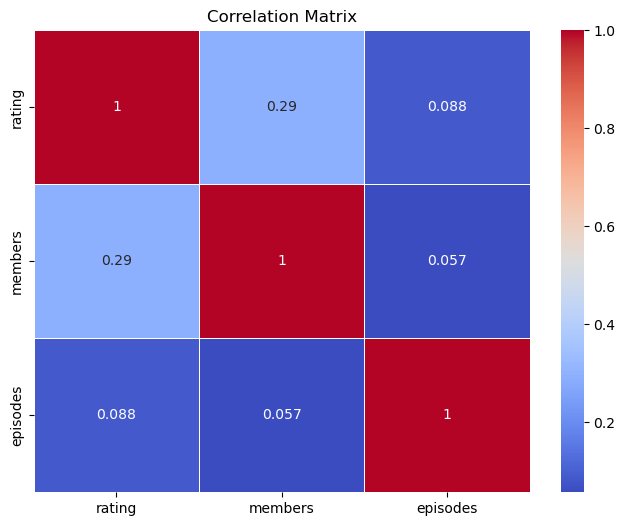

In [29]:
# Correlation matrix
corr_matrix = anime_df[['rating', 'members', 'episodes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### 5.7. User Rating Distribution

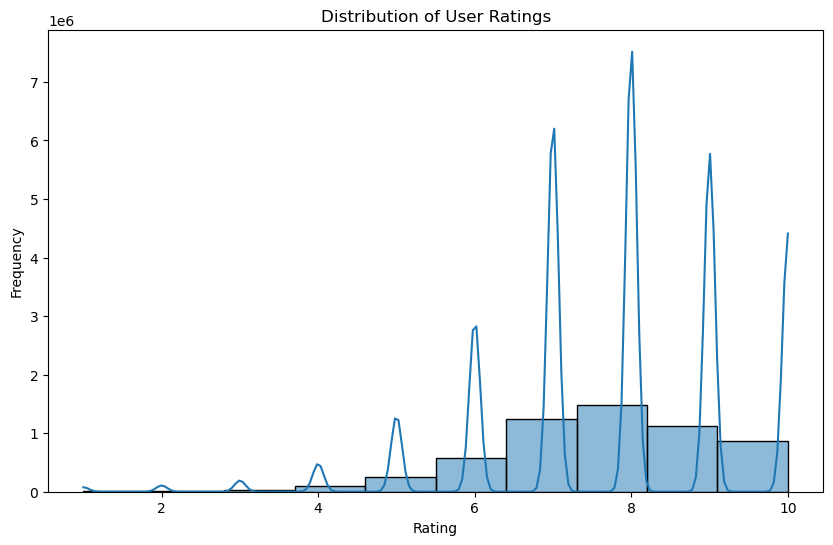

In [184]:
# Distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(train_df['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 5. Exploratory Data Analysis (EDA)

#### 5.1 EDA on anime_df
Summary Statistics: Get an overview of the dataset.
Distribution of Anime Types: Analyze the types of anime (e.g., TV, Movie, OVA).
Distribution of Genres: Analyze the genres and their frequency.
Rating Distribution: Visualize the distribution of anime ratings.
Members Distribution: Analyze the distribution of the number of members who have rated the anime.

#### 5.2. Distribution of Rating

#### 5.3. Distribution of Number of Members

#### 5.4. Rating by Anime Type

#### 5.5. Top 10 Most Popular Anime

#### 5.8. Top Rated Animes by Users

### 6. Preprocessing

### 7. Model Training

### 8. Model Evaluation

### 9. Hyperparameter Tuning

### 10. Conclusion